In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble
from qiskit.providers.ibmq import least_busy
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
import qiskit.quantum_info as qi
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
simulator = QasmSimulator()

In [3]:
def build_qft_circuit(n_bits,input_qubits):
    circuit_qft = QuantumCircuit(n_bits, n_bits)
    for i in range(len(input_qubits)):
        print(i)
        if(input_qubits[i] == 1):
            circuit_qft.x(len(input_qubits)-1-i)
    circuit_qft.barrier()
    print('inside construction circuit')
    for i in range(n_bits-1,0,-1):
        circuit_qft.h(i)
        for j in range(2,n_bits+1):
            print(i,j,i-j+1)
            circuit_qft.cp((2*np.pi)/(2**j),i-j+1,i)
            if(i-j+1 == 0):
                break
        print('end for j')
    circuit_qft.h(0)
    circuit_qft.barrier()
    #SWAP operation
    for i in range(0,int(n_bits/2)):
        circuit_qft.swap(i,n_bits-1-i)
    circuit_qft.barrier()
    return circuit_qft

In [4]:
def build_inv_qft_circuit(n_bits):
    circuit_qft = QuantumCircuit(n_bits, n_bits)
    circuit_qft.barrier()
    #SWAP operation
    for i in range(0,int(n_bits/2)):
        circuit_qft.swap(i,n_bits-1-i)
    circuit_qft.barrier()
    print('inside construction circuit')
    circuit_qft.h(0)
    for i in range(1, n_bits):
        for j in range(2,i+2):
            print(i,j,i-j+1)
            circuit_qft.cp((-2*np.pi)/(2**j),i-j+1,i)
            if(i-j+1 == 0):
                break
        print('end for j')
        circuit_qft.h(i)
    circuit_qft.barrier()
    return circuit_qft

In [5]:
def build_inv_qft_circuit_2(circuit_qft, n_bits):
    #circuit_qft = QuantumCircuit(n_bits, n_bits)
    circuit_qft.barrier()
    #SWAP operation
    for i in range(0,int(n_bits/2)):
        circuit_qft.swap(i,n_bits-1-i)
    circuit_qft.barrier()
    print('inside construction circuit')
    circuit_qft.h(0)
    for i in range(1, n_bits):
        for j in range(2,i+2):
            print(i,j,i-j+1)
            circuit_qft.cp((-2*np.pi)/(2**j),i-j+1,i)
            if(i-j+1 == 0):
                break
        print('end for j')
        circuit_qft.h(i)
    circuit_qft.barrier()
    return circuit_qft

0
1
2
inside construction circuit
2 2 1
2 3 0
end for j
1 2 0
end for j


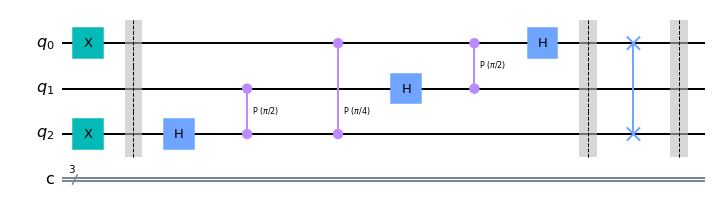

In [6]:
n_bits = 3
circuit_qft = build_qft_circuit(n_bits,[1,0,1])
circuit_qft.draw()

inside construction circuit
1 2 0
end for j
2 2 1
2 3 0
end for j


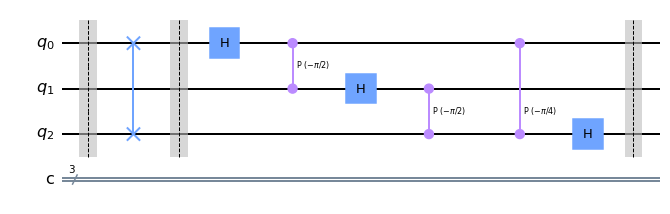

In [15]:
circuit_inv_qft = build_inv_qft_circuit(n_bits)
circuit_inv_qft.draw()

0
1
2
inside construction circuit
2 2 1
2 3 0
end for j
1 2 0
end for j
inside construction circuit
1 2 0
end for j
2 2 1
2 3 0
end for j


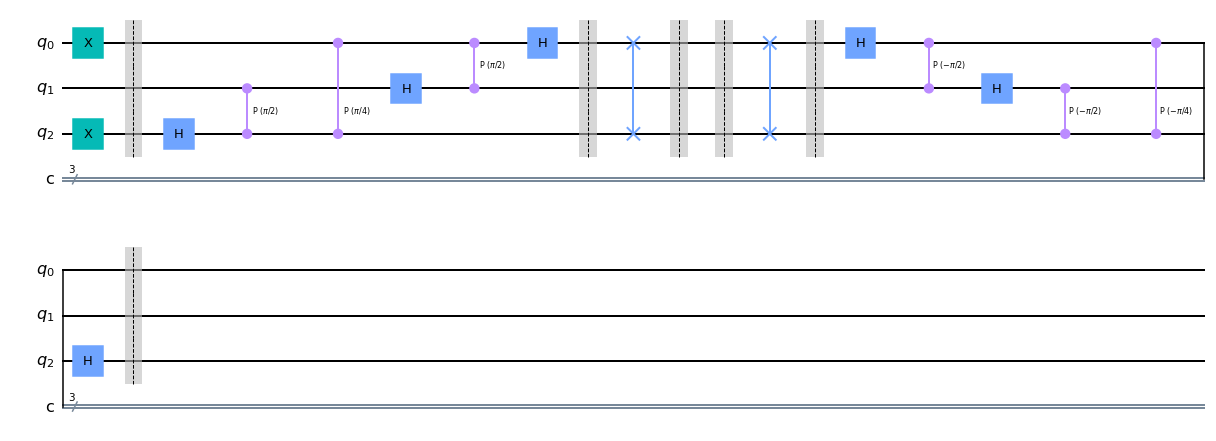

In [17]:
circuit_qft_invqft = build_qft_circuit(n_bits,[1,0,1])
circuit_qft_invqft = build_inv_qft_circuit_2(circuit_qft_invqft, n_bits)
circuit_qft_invqft.draw()

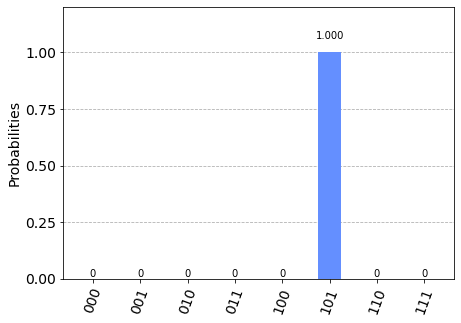

In [19]:
zero = qi.Statevector.from_label('000')
sv = zero.evolve(circuit_qft_invqft)
probs = sv.probabilities_dict()
plot_histogram(probs)


In [20]:
circuit_qft_invqft.measure(0, 0)
circuit_qft_invqft.measure(1, 1)
circuit_qft_invqft.measure(2, 2)
# circuit_qft_invqft.measure(3, 3)
# circuit_qft_invqft.measure(4, 4)

provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2  and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_lima


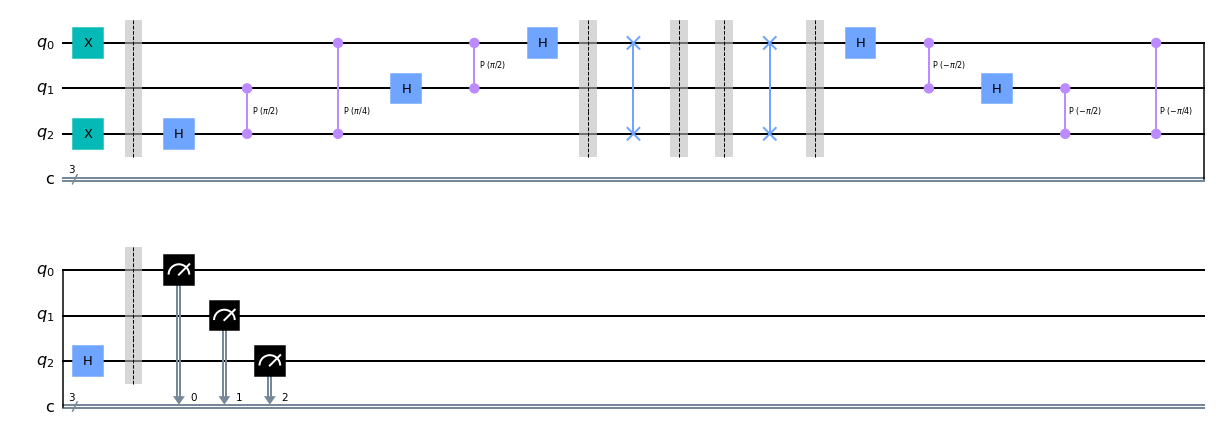

In [21]:
circuit_qft_invqft.draw()

In [22]:
from qiskit.tools.monitor import job_monitor

shots = 5000
transpiled_circuit = transpile(circuit_qft_invqft, backend, optimization_level=3)
qobj = assemble(transpiled_circuit, backend)
job = backend.run(qobj)
job_monitor(job, interval=2)

Job Status: job has successfully run


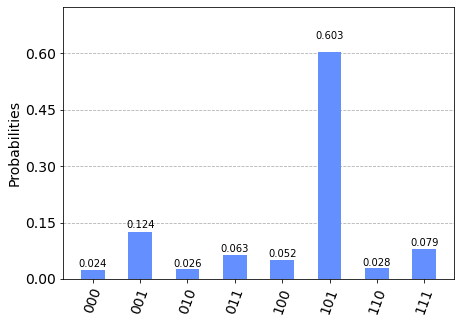

In [23]:
results = job.result()
answer = results.get_counts()

plot_histogram(answer)